## Scale-Invariant Feature Transform (SIFT)
##### Use 'images' conda environment here or 'xfeatures2d' submodule of 'images2'

In [43]:
import cv2
from matplotlib import pyplot as plt

Keypoints:  226


(-0.5, 517.5, 390.5, -0.5)

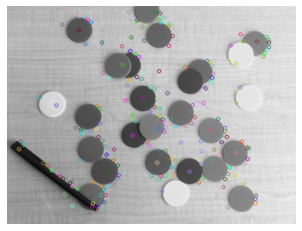

In [44]:
img = cv2.imread('images/matlab/coloredChips.png', 0)

sift = cv2.xfeatures2d.SIFT_create()
# keypoints = sift.detect(img, None)
keypoints, descriptors = sift.detectAndCompute(img, None)
img2 = cv2.drawKeypoints(img, keypoints, None)
print(f"Keypoints: ", len(keypoints))

plt.imshow(img2)
plt.axis('off')

## Speeded-Up Robust Featuers (SURF)

SURF is good at handling images with blur and rotation, but is not good at handling perspective changes and lighting changes

Keypoints:  23
Descriptor dimensions:  64


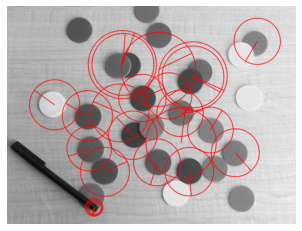

In [3]:
img = cv2.imread('images/matlab/coloredChips.png', 0)

surf = cv2.xfeatures2d.SURF_create(5000)
# surf.setUpright(True) # removes orientation of keypoints when set to true
# surf.setExtended(True) # yields 128-dim descriptors when set to true

keypoints, descriptors = surf.detectAndCompute(img, None)

# a value of 300-500 keypointsnis good
# I have reduced them here for representation on the image
print('Keypoints: ', len(keypoints))
print('Descriptor dimensions: ', surf.descriptorSize())

img2 = cv2.drawKeypoints(img, keypoints, None, (255, 0, 0), 4)
plt.imshow(img2)
plt.axis('off')
plt.show()

## Features from Accelerated Segment Test (FAST)
High-Speed Approach for Corner Detection

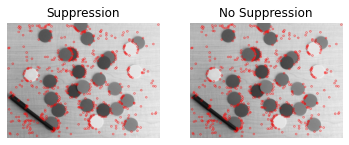

In [42]:
img = cv2.imread('images/matlab/coloredChips.png', 0)

fast = cv2.FastFeatureDetector_create()
keypoints = fast.detect(img, None)
img2 = cv2.drawKeypoints(img, keypoints, None, color=(255, 0, 0))

# plt.figure(figsize=(5, 10)
plt.subplot(121), plt.imshow(img2), plt.title('Suppression'), plt.axis('off')

fast.setNonmaxSuppression(0)
img3 = cv2.drawKeypoints(img, keypoints, None, color=(255, 0, 0))
plt.subplot(122), plt.imshow(img2), plt.title('No Suppression'), plt.axis('off')
plt.show()


## Binary Robust Independent Elementary Features (BRIEF)
A method for extracting feature descriptors. It does not detect keypoints. BRIEF recommends the use of CenSurE for detecting the keypoints

In [28]:
img = cv2.imread('images/matlab/hallway.jpg', 0)

# CenSurE detector
star = cv2.xfeatures2d.StarDetector_create()

# BRIEF feature descriptor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# find keypoints with CenSurE
kp = star.detect(img, None)

# compute descriptors
keypoints, descriptors = brief.compute(img, kp)

print(brief.descriptorSize())

32


## Oriented FAST and Rotated BRIEF (ORB)
A faster, open-source (free) and equally good alternative to SIFT and FAST

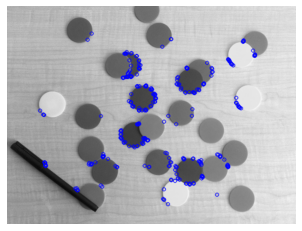

In [41]:
# read image
img = cv2.imread('images/matlab/coloredChips.png', 0)

# initiate ORB detector
orb = cv2.ORB_create()

# find keypoints
kp = orb.detect(img, None)

# compute the descriptors
keypoints, descriptors = orb.compute(img, kp)

# draw keypoints on the image
img2 = cv2.drawKeypoints(img, keypoints, None, (0,0,255), flags=0)
plt.imshow(img2), plt.axis('off')
plt.show()

# Feature Matching
### Brute Force Matching using ORB

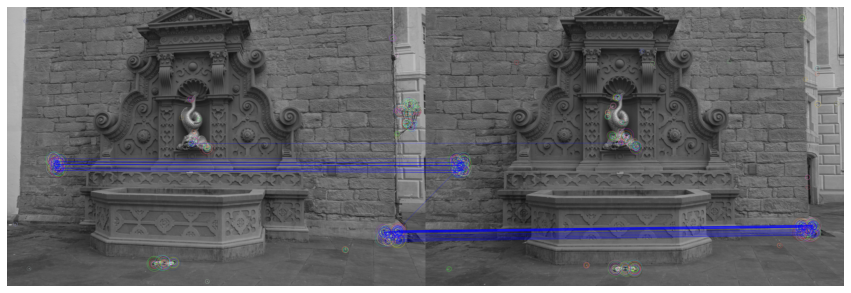

In [79]:
img1 = cv2.imread('images/fountain-p11/0004.jpg',0)
img2 = cv2.imread('images/fountain-p11/0005.jpg',0)

orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# match the descriptors
matches = bf.match(des1, des2)

# sort them accoring to distance
matches = sorted(matches, key=lambda x:x.distance)

# draw lines for the first 10 matches
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, matchColor=(0,0,255), flags=4)

# plot
plt.figure(figsize=(15,30))
plt.imshow(img3)
plt.axis('off')
plt.show()

### Brute Force Matching using SIFT

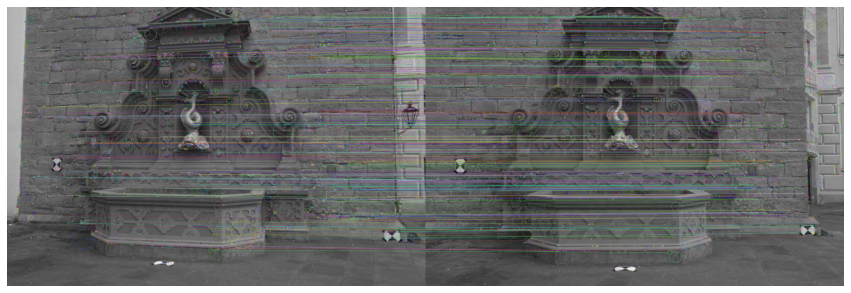

In [87]:
# read images
img1 = cv2.imread('images/fountain-p11/0004.jpg', 0)
img2 = cv2.imread('images/fountain-p11/0005.jpg', 0)

# create SIFT object
sift = cv2.xfeatures2d.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# create a BFMatcher object
bf = cv2.BFMatcher()

# find matches
matches = bf.knnMatch(des1, des2, k=2)

# apply the ratio test
good = []
for m,n in matches:
    if m.distance < 0.25*n.distance:
        good.append([m])

        # good should be a list of lists        
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=4)
plt.figure(figsize=(15,30))
plt.imshow(img3)
plt.axis('off')
plt.show()

### FLANN Based Matching

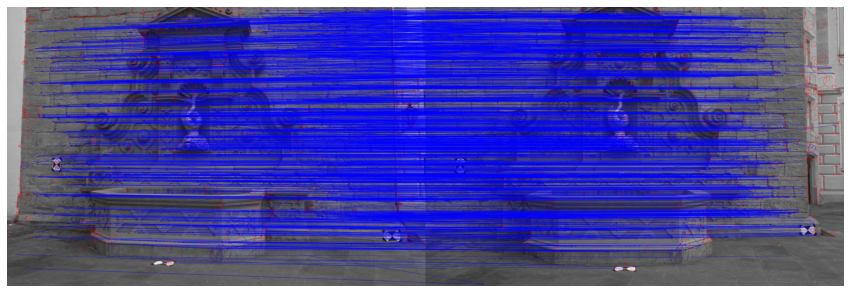

In [96]:
img1 = cv2.imread('images/fountain-p11/0004.jpg', 0)
img2 = cv2.imread('images/fountain-p11/0005.jpg', 0)

sift = cv2.xfeatures2d.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# FLANN Based Parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# mask the matches to draw only googd matches
matchesMask = [[0,0] for i in range(len(matches))]

# apply the ratio test
for i, (m,n) in enumerate(matches):
    if m.distance < 0.75*n.distance:
        matchesMask[i] = [1,0]

draw_params = dict(matchColor=(0,0,255), singlePointColor=(255,0,0), matchesMask=matchesMask, flags=4)

img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)

plt.figure(figsize=(15,30))
plt.imshow(img3)
plt.axis('off')
plt.show()